In [1]:
#    Este notebook Reune del periodo 1/2019 a 3/2022, los precios de los indices mundiales
#     mas importantes, en su dataframe  [ df_indices ]  ir a celda [28] para verlo directamente.
#
#                                    Indices utilizados:
#
#   -  DOLAR : "DYX" (The U.S. Dollar Index is used to measure the value of the dollar against 
#      a basket of six world currencies: Euro, Swiss Franc, Japanese Yen, Canadian dollar, 
#      British pound, and Swedish Krona)  [ df_DYX ]
#       
#   -  USA : "S&P500" ("Standard and Poor 500" is a stock market index tracking the performance 
#       of 500 large companies listed on stock exchanges in the United States) [ df_SP500 ]
#
#   -  CHINA: "SHCOMP" (The Shanghai Stock Exchange is one of the three stock exchanges 
#      operating independently in mainland China, the others being the Beijing Stock Exchange
#      and the Shenzhen Stock Exchange. The Shanghai Stock Exchange is the world's 3rd largest 
#      stock market by market capitalization at US$7.62 trillion as of July 2021.  [df_SHAX]
#
#   -  EUROPA : 
#      
#      "UKX" (The "FTSE 100 Index" The Financial Times Stock Exchange 100 Index,
#      is a share index of the 100 companies listed on the London Stock Exchange with
#      (in principle) the highest market capitalisation.   [df_UKX]
#
#      "SX5P" (The STOXX Europe 50 index provides a blue-chip representation of supersector 
#       leaders in Europe covering almost 50% of the free-float market capitalization of 
#       the European stock market.)    [df_SX5P]
#
#      La finalidad de este notebook es la de realizar un unico DataFrame que nuclee estos indices,
#                para asi ser utilizados como una variable bursatil. 
#   

In [2]:
# Dark Mode: Correr opcional

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

In [3]:
# Importacion Librerias

import pandas as pd
import pandas_profiling
from functools import reduce
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter


In [4]:
#                                         DYX

# Importamos dataset
# Dejamos la unica columna: el precio de cierre. 

df_DYX= pd.read_csv('Desktop/US_DXY.csv', sep='","')
df_DYX.drop(columns=['"Open"','"High"','"Low"'], inplace=True)
df_DYX

C:\Users\W10\miniconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,"""Date""","""Close"""
0,"""03/2022""","""99.06"""
1,"""02/2022""","""96.71"""
2,"""01/2022""","""96.54"""
3,"""12/2021""","""95.97"""
4,"""11/2021""","""95.99"""
5,"""10/2021""","""94.12"""
6,"""09/2021""","""94.23"""
7,"""08/2021""","""92.63"""
8,"""07/2021""","""92.17"""
9,"""06/2021""","""92.44"""


In [5]:
#Renombramos columnas

df_DYX.rename(columns={'"Close"': '$DYX', '"Date"' : 'Fecha'}, inplace=True)
df_DYX

,Fecha,$DYX
0,"""03/2022""","""99.06"""
1,"""02/2022""","""96.71"""
2,"""01/2022""","""96.54"""
3,"""12/2021""","""95.97"""
4,"""11/2021""","""95.99"""
5,"""10/2021""","""94.12"""
6,"""09/2021""","""94.23"""
7,"""08/2021""","""92.63"""
8,"""07/2021""","""92.17"""
9,"""06/2021""","""92.44"""


In [6]:
#Limpiamos los campos de caracteres especiales

df_DYX = df_DYX.replace({'"':''}, regex=True)
df_DYX

,Fecha,$DYX
0,03/2022,99.06
1,02/2022,96.71
2,01/2022,96.54
3,12/2021,95.97
4,11/2021,95.99
5,10/2021,94.12
6,09/2021,94.23
7,08/2021,92.63
8,07/2021,92.17
9,06/2021,92.44


In [7]:
#

In [8]:
#

In [9]:
#                                  S&P500

# Importamos dataset y le quitamos caracteres especiales

df_SP500 = pd.read_csv('Desktop/US_S&P_500.csv', sep=',')
df_SP500 = df_SP500.replace({'"':''}, regex=True)
df_SP500

,Date,Close
0,"03/2022, 4,204.31",NaN
1,"02/2022, 4,373.94",NaN
2,"01/2022, 4,515.55",NaN
3,"12/2021, 4,766.18",NaN
4,"11/2021, 4,567.00",NaN
5,"10/2021,4,605.38",NaN
6,"09/2021, 4,307.54",NaN
7,"08/2021, 4,522.68",NaN
8,"07/2021, 4,395.26",NaN
9,"06/2021, 4,297.50",NaN


In [10]:
# Procedemos separar los valores apelmasados de la columna "date" a dos nuevas
# columnas: "Fecha" y "S&P500"

df_SP500['Date'].str.split(', ', expand=True)
df_SP500[['Fecha', '$S&P500']] = df_SP500['Date'].str.split(', ', expand=True)
df_SP500

,Date,Close,Fecha,$S&P500
0,"03/2022, 4,204.31",NaN,03/2022,"4,204.31"
1,"02/2022, 4,373.94",NaN,02/2022,"4,373.94"
2,"01/2022, 4,515.55",NaN,01/2022,"4,515.55"
3,"12/2021, 4,766.18",NaN,12/2021,"4,766.18"
4,"11/2021, 4,567.00",NaN,11/2021,"4,567.00"
5,"10/2021,4,605.38",NaN,"10/2021,4,605.38",None
6,"09/2021, 4,307.54",NaN,09/2021,"4,307.54"
7,"08/2021, 4,522.68",NaN,08/2021,"4,522.68"
8,"07/2021, 4,395.26",NaN,07/2021,"4,395.26"
9,"06/2021, 4,297.50",NaN,06/2021,"4,297.50"


In [11]:
# Eliminamos las columnas obsoletas

df_SP500.drop(columns=['Close','Date'], inplace=True)
df_SP500

,Fecha,$S&P500
0,03/2022,"4,204.31"
1,02/2022,"4,373.94"
2,01/2022,"4,515.55"
3,12/2021,"4,766.18"
4,11/2021,"4,567.00"
5,"10/2021,4,605.38",None
6,09/2021,"4,307.54"
7,08/2021,"4,522.68"
8,07/2021,"4,395.26"
9,06/2021,"4,297.50"


In [12]:
#Corregimos el error de la fila 5 

df_SP500.at[5,'Fecha'] = "10/2021"
df_SP500.at[5,'$S&P500'] = "4,605.38" 
df_SP500

,Fecha,$S&P500
0,03/2022,"4,204.31"
1,02/2022,"4,373.94"
2,01/2022,"4,515.55"
3,12/2021,"4,766.18"
4,11/2021,"4,567.00"
5,10/2021,"4,605.38"
6,09/2021,"4,307.54"
7,08/2021,"4,522.68"
8,07/2021,"4,395.26"
9,06/2021,"4,297.50"


In [13]:
#

In [14]:
#                                        SHCOMP

# Importamos los datos para el Indice SHCOMP

df_SHAX = pd.read_csv('Desktop/XSHG.csv', sep=', ')
df_SHAX.rename(columns={'Date':'Fecha' , 'Close': '$SHA'}, inplace=True)
df_SHAX

C:\Users\W10\miniconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Fecha,$SHA
0,03/2022,"3,309.75"
1,02/2022,"3,462.31"
2,01/2022,"3,361.44"
3,12/2021,"3,639.78"
4,11/2021,"3,563.89"
5,10/2021,"3,547.34"
6,09/2021,"3,568.17"
7,08/2021,"3,543.94"
8,07/2021,"3,397.36"
9,06/2021,"3,591.20"


In [15]:
# Arreglamos las celdas de la fila 36

df_SHAX.at[36,'Fecha'] = "03/2019"
df_SHAX.at[36,'$SHA'] = "3,090.76"
df_SHAX

,Fecha,$SHA
0,03/2022,"3,309.75"
1,02/2022,"3,462.31"
2,01/2022,"3,361.44"
3,12/2021,"3,639.78"
4,11/2021,"3,563.89"
5,10/2021,"3,547.34"
6,09/2021,"3,568.17"
7,08/2021,"3,543.94"
8,07/2021,"3,397.36"
9,06/2021,"3,591.20"


In [16]:
#

In [17]:
#                                       UKX

df_UKX= pd.read_csv('Desktop/UKX.csv', sep=', ')
df_UKX = df_UKX.replace({'"':''}, regex=True)
df_UKX

C:\Users\W10\miniconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Date,Close
0,03/2022,"7,155.64"
1,02/2022,"7,458.25"
2,01/2022,"7,464.37"
3,12/2021,"7,384.54"
4,11/2021,"7,059.45"
5,10/2021,"7,237.57"
6,09/2021,"7,086.42"
7,08/2021,"7,119.70"
8,07/2021,"7,032.30"
9,06/2021,"7,037.47"


In [18]:
# Renombramos columnas

df_UKX.rename(columns={'Date': 'Fecha' , 'Close':'$UKX'}, inplace=True)
df_UKX

,Fecha,$UKX
0,03/2022,"7,155.64"
1,02/2022,"7,458.25"
2,01/2022,"7,464.37"
3,12/2021,"7,384.54"
4,11/2021,"7,059.45"
5,10/2021,"7,237.57"
6,09/2021,"7,086.42"
7,08/2021,"7,119.70"
8,07/2021,"7,032.30"
9,06/2021,"7,037.47"


In [19]:
#                                       SX5P

df_SX5P= pd.read_csv('Desktop/SX5P.csv', sep=', ')
df_SX5P = df_SX5P.replace({'"':''}, regex=True)
df_SX5P

C:\Users\W10\miniconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Date,Close
0,03/2022,"3,491.13"
1,02/2022,"3,642.44"
2,01/2022,"3,747.52"
3,12/2021,"3,818.46"
4,11/2021,"3,593.42"
5,10/2021,"3,688.32"
6,09/2021,"3,499.42"
7,08/2021,"3,617.19"
8,07/2021,"3,555.81"
9,06/2021,"3,512.50"


In [20]:
# Renombramos columnas

df_SX5P.rename(columns={'Date': 'Fecha' , 'Close':'$SX5P'}, inplace=True)
df_SX5P

,Fecha,$SX5P
0,03/2022,"3,491.13"
1,02/2022,"3,642.44"
2,01/2022,"3,747.52"
3,12/2021,"3,818.46"
4,11/2021,"3,593.42"
5,10/2021,"3,688.32"
6,09/2021,"3,499.42"
7,08/2021,"3,617.19"
8,07/2021,"3,555.81"
9,06/2021,"3,512.50"


In [21]:
#                                  Merge de Dataframes

In [22]:
# Compilamos los df

df_todos = [df_DYX, df_SP500, df_SHAX, df_UKX , df_SX5P]

In [23]:
# Hacemos el merge utilizando la Fecha como clave principal.

df_merge = reduce(lambda  left,right: pd.merge(left,right,on=['Fecha'],
                                            how='outer'), df_todos)

df_merge


,Fecha,$DYX,$S&P500,$SHA,$UKX,$SX5P
0,03/2022,99.06,"4,204.31","3,309.75","7,155.64","3,491.13"
1,02/2022,96.71,"4,373.94","3,462.31","7,458.25","3,642.44"
2,01/2022,96.54,"4,515.55","3,361.44","7,464.37","3,747.52"
3,12/2021,95.97,"4,766.18","3,639.78","7,384.54","3,818.46"
4,11/2021,95.99,"4,567.00","3,563.89","7,059.45","3,593.42"
5,10/2021,94.12,"4,605.38","3,547.34","7,237.57","3,688.32"
6,09/2021,94.23,"4,307.54","3,568.17","7,086.42","3,499.42"
7,08/2021,92.63,"4,522.68","3,543.94","7,119.70","3,617.19"
8,07/2021,92.17,"4,395.26","3,397.36","7,032.30","3,555.81"
9,06/2021,92.44,"4,297.50","3,591.20","7,037.47","3,512.50"


In [24]:
# Reordenamos por fecha y reindexamos (1/2)

df_indices = df_merge[::-1]
df_indices

,Fecha,$DYX,$S&P500,$SHA,$UKX,$SX5P
38,01/2019,95.58,"2,704.10","2,584.57","6,968.85","2,897.13"
37,02/2019,96.16,"2,709.80","2,940.95","7,074.73","3,029.67"
36,03/2019,97.28,"2,834.40","3,090.76","7,279.19","3,117.01"
35,04/2019,97.48,"2,945.83","3,078.34","7,418.22","3,199.51"
34,05/2019,97.61,"2,752.06","2,898.70","7,161.71","3,042.89"
33,06/2019,96.11,"2,941.76","2,978.88","7,425.63","3,178.94"
32,07/2019,98.52,"2,980.38","2,932.51","7,586.78","3,181.29"
31,08/2019,98.92,"2,926.46","2,886.24","7,207.18","3,136.23"
30,09/2019,99.38,"2,976.74","2,905.19","7,408.21","3,255.74"
29,10/2019,97.35,"3,037.56","2,929.06","7,248.38","3,267.22"


In [25]:
# Reordenamos por fecha y reindexamos (2/2)

df_indices = df_indices.reset_index()
df_indices.drop(columns={'index'}, inplace=True)
df_indices

,Fecha,$DYX,$S&P500,$SHA,$UKX,$SX5P
0,01/2019,95.58,"2,704.10","2,584.57","6,968.85","2,897.13"
1,02/2019,96.16,"2,709.80","2,940.95","7,074.73","3,029.67"
2,03/2019,97.28,"2,834.40","3,090.76","7,279.19","3,117.01"
3,04/2019,97.48,"2,945.83","3,078.34","7,418.22","3,199.51"
4,05/2019,97.61,"2,752.06","2,898.70","7,161.71","3,042.89"
5,06/2019,96.11,"2,941.76","2,978.88","7,425.63","3,178.94"
6,07/2019,98.52,"2,980.38","2,932.51","7,586.78","3,181.29"
7,08/2019,98.92,"2,926.46","2,886.24","7,207.18","3,136.23"
8,09/2019,99.38,"2,976.74","2,905.19","7,408.21","3,255.74"
9,10/2019,97.35,"3,037.56","2,929.06","7,248.38","3,267.22"


In [26]:
# Hasta aqui, el dataframe ordenado. 

In [27]:
# Vemos que tipos de valores posee

df_indices.dtypes

# Problema = en la columna DYX el decimal esta correctamente marcado por el .punto,
# Mientras que el resto de las columnas utilizan una ,coma. para marcar el "mil", y el .punto
# correctamente para marcar el decimal.

Fecha      object
$DYX       object
$S&P500    object
$SHA       object
$UKX       object
$SX5P      object
dtype: object

In [28]:
df_indices = df_indices.replace({',':''}, regex=True)
df_indices

,Fecha,$DYX,$S&P500,$SHA,$UKX,$SX5P
0,01/2019,95.58,2704.10,2584.57,6968.85,2897.13
1,02/2019,96.16,2709.80,2940.95,7074.73,3029.67
2,03/2019,97.28,2834.40,3090.76,7279.19,3117.01
3,04/2019,97.48,2945.83,3078.34,7418.22,3199.51
4,05/2019,97.61,2752.06,2898.70,7161.71,3042.89
5,06/2019,96.11,2941.76,2978.88,7425.63,3178.94
6,07/2019,98.52,2980.38,2932.51,7586.78,3181.29
7,08/2019,98.92,2926.46,2886.24,7207.18,3136.23
8,09/2019,99.38,2976.74,2905.19,7408.21,3255.74
9,10/2019,97.35,3037.56,2929.06,7248.38,3267.22


In [29]:
df_indices.info

<bound method DataFrame.info of       Fecha   $DYX  $S&P500     $SHA     $UKX    $SX5P
0   01/2019  95.58  2704.10  2584.57  6968.85  2897.13
1   02/2019  96.16  2709.80  2940.95  7074.73  3029.67
2   03/2019  97.28  2834.40  3090.76  7279.19  3117.01
3   04/2019  97.48  2945.83  3078.34  7418.22  3199.51
4   05/2019  97.61  2752.06  2898.70  7161.71  3042.89
5   06/2019  96.11  2941.76  2978.88  7425.63  3178.94
6   07/2019  98.52  2980.38  2932.51  7586.78  3181.29
7   08/2019  98.92  2926.46  2886.24  7207.18  3136.23
8   09/2019  99.38  2976.74  2905.19  7408.21  3255.74
9   10/2019  97.35  3037.56  2929.06  7248.38  3267.22
10  11/2019  98.27  3140.98  2871.98  7346.53  3344.72
11  12/2019  96.39  3230.78  3050.12  7542.44  3403.03
12  01/2020  96.50  3225.52  3092.29  7587.85  3433.74
13  02/2020  98.13  2954.22  2880.30  6580.61  3060.01
14  03/2020  99.05  2584.59  2750.30  5671.96  2730.31
15  04/2020  99.02  2912.43  2860.08  5901.21  2853.47
16  05/2020  98.34  3044.31  2852

In [30]:
# Transformamos todos los valores de objeto a float para poder manipularlos.

df_indices['$DYX'] = pd.to_numeric(df_indices['$DYX'],errors = 'coerce')
df_indices['$S&P500'] = pd.to_numeric(df_indices['$S&P500'],errors = 'coerce')
df_indices['$SHA'] = pd.to_numeric(df_indices['$SHA'],errors = 'coerce')
df_indices['$UKX'] = pd.to_numeric(df_indices['$UKX'],errors = 'coerce')
df_indices['$SX5P'] = pd.to_numeric(df_indices['$SX5P'],errors = 'coerce')


In [31]:
df_indices['Fecha'] = df_indices['Fecha'].astype('string')

In [38]:
# Chequeamos

df_indices.dtypes

Fecha       string
$DYX       float64
$S&P500    float64
$SHA       float64
$UKX       float64
$SX5P      float64
dtype: object

In [40]:
df_indices.to_csv('Indices.csv')

<AxesSubplot:xlabel='Fecha'>

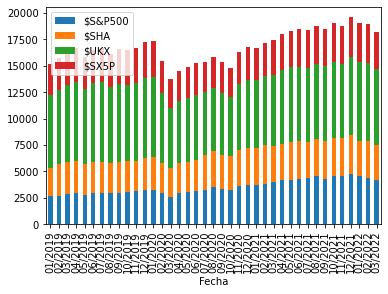

In [33]:
# Graficamos unas barras apiladas para apreciar el volumen total y particular.

df_indices.plot.bar(x='Fecha',y=['$S&P500','$SHA','$UKX','$SX5P'], stacked=True)


In [34]:
#Seleccionamos el ultimo mes disponible para realizar una visualizacion

df_marzo22 = (df_indices.loc[[38]])
df_marzo22.drop(columns=['Fecha','$DYX'], inplace=True)    #Dejamos solo las variables a comparar
df_marzo22 =df_marzo22.transpose()       # Invertimos filas y columnas para facilitar la visualizacion
df_marzo22

,38
$S&P500,4204.31
$SHA,3309.75
$UKX,7155.64
$SX5P,3491.13


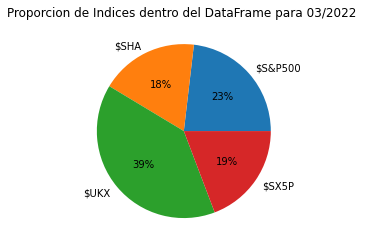

In [35]:
# Hagamos un grafico de torta para visualizar cuanto ocupa cada Rubro dentro 
#   del indice promedio para el ultimo año


x = (df_marzo22[38])
labels = ['$S&P500','$SHA', '$UKX','$SX5P']

fig, ax = plt.subplots()
ax.pie(x, labels = labels,autopct='%.0f%%', radius=1)
ax.set_title('Proporcion de Indices dentro del DataFrame para 03/2022 ')
plt.show()

In [36]:
#

In [37]:
#